In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import re

plt.rcParams.update({'font.size':14, 'savefig.facecolor':'w'})

[0.72266222 0.06437092]


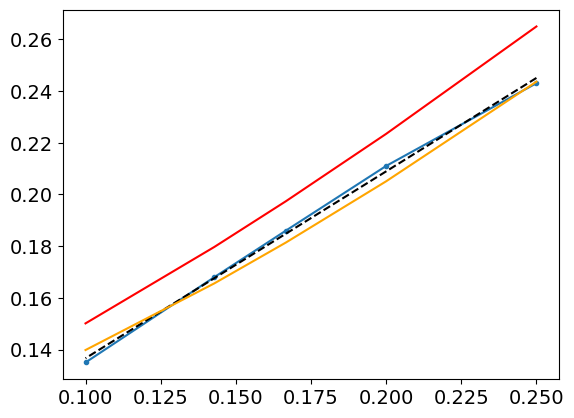

In [17]:
gamma = 20 / np.array([80, 100, 120, 140, 200])
y = np.array([0.243, 0.211, 0.186, 0.168, 0.135])

print(np.polyfit(gamma, y, deg=1))
a, b =np.polyfit(gamma, y, deg=1)

plt.plot(gamma, y, '.-')
plt.plot(gamma, gamma * a +b, '--k' )
plt.plot(gamma, 0.1 + gamma ** 1.3, 'r')
plt.plot(gamma, 0.1 + gamma ** 1.4, color='orange')

In [2]:
folder_pics = 'pics2/'
prefix = 'tmp_cs2_0.33'
folders = [folder for folder in sorted(os.listdir()) if os.path.isdir(folder) and folder.startswith(prefix)]
folders

['tmp_cs2_0.33_re_1.00_nu_0.30_u_0.03_tau_1.40_cy_120.00_W_161',
 'tmp_cs2_0.33_re_1.00_nu_0.30_u_0.03_tau_1.40_cy_150.00_W_201',
 'tmp_cs2_0.33_re_1.00_nu_0.30_u_0.03_tau_1.40_cy_60.00_W_81',
 'tmp_cs2_0.33_re_1.00_nu_0.30_u_0.03_tau_1.40_cy_75.00_W_101',
 'tmp_cs2_0.33_re_1.00_nu_0.30_u_0.03_tau_1.40_cy_90.00_W_121']

In [4]:
short = False

d = {}
for folder in tqdm(folders):
#     print(folder)
    if not short:
        arr = np.loadtxt(folder + '/disk_re_0.25_0.txt')
        np.save(folder + '/disk_re_0.25_0_every_100.npy', arr[::100])
    else:
        arr = np.load((folder + '/disk_re_0.25_0_every_100.npy'))
        
    d[folder] = arr#[::100]
#     print(d[folder].shape)

100%|█████████████████████████████████████████████| 5/5 [00:08<00:00,  1.72s/it]


In [5]:
reynolds = [float(re.findall('_re_([0-9]{1}[.][0-9]{2})_', f)[0]) for f in folders]
print('re = ', re)
cs2 = [float(re.findall('_cs2_([0-9]{1}[.][0-9]{2})_', f)[0]) for f in folders]
print('cs2 = ', cs2)
nu = [float(re.findall('_nu_([0-9]{1}[.][0-9]{2})_', f)[0]) for f in folders]
print('nu = ',nu)
u = [float(re.findall('_u_([0-9]{1}[.][0-9]{2})_', f)[0]) for f in folders]
print('u = ', u)
tau = [float(re.findall('_tau_([0-9]{1}[.][0-9]{2})_', f)[0]) for f in folders]
print('tau = ', tau)
# L = [int(f.split('_')[16]) for f in folders]
# print('L = ', L)
W = [int(re.findall('_W_([0-9]*)', f)[0]) for f in folders]
print('W = ', W)
#inc = [x + 'BGK' for x in inc]
#inc = [x.replace('comp', '') for x in inc]

re =  <module 're' from '/home/masha/miniconda3/envs/lbm/lib/python3.10/re.py'>
cs2 =  [0.33, 0.33, 0.33, 0.33, 0.33]
nu =  [0.3, 0.3, 0.3, 0.3, 0.3]
u =  [0.03, 0.03, 0.03, 0.03, 0.03]
tau =  [1.4, 1.4, 1.4, 1.4, 1.4]
W =  [161, 201, 81, 101, 121]


In [6]:
col = {81:'salmon', 41:'yellow', 51:'greenyellow', 
       101:'mediumseagreen', 161:'deepskyblue',  121:'navy', 
       201:'mediumorchid'}
line = {41:'-', 81:'--', 35:':'}
alpha = {'incBGK': 1, 'BGK':0.4}
marker = {0.03:'d', 0.08:'o', 0.015:'^'}

In [109]:
%matplotlib notebook

161 0.846 0.154
201 0.860 0.140
81 0.758 0.242
101 0.790 0.210
121 0.814 0.186


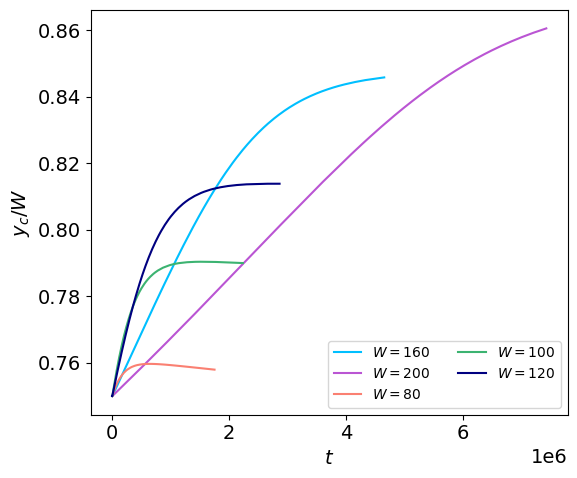

In [51]:
y_st = []
fig, ax = plt.subplots(figsize=(6,5))
for i, k in enumerate(sorted(d.keys())):
    #if inc[i] == 'BGK': continue
    label = r'$W=%d$'%(W[i]-1)
    arr = d[k]
    arr = arr[:-arr.shape[0]//25]
    mask = arr[:, 0] * u[i] / 10 < 8000000
    y_st.append([W[i], arr[mask,2][-1] / (W[i] - 1)])
    print(W[i], f'{arr[mask,2][-1] / (W[i] - 1):.3f}', f'{1 -arr[mask,2][-1] / (W[i] - 1):.3f}',
         )
    plt.plot(arr[mask,0] 
             #* u[i] / 10
             , arr[mask,2] / (W[i]- 1), 
#              '.',
             color=col[W[i]],
#              linestyle=line[W[i]],
#              markevery=[-1],
#              marker=marker[u[i]],
             markersize=7,
             label=label)
    
plt.legend(loc='lower right', fontsize=10, ncol=2)
# ax.set_ylim([0.7, 1])

ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$y_c / W$')

fig.tight_layout()

fig.savefig(folder_pics + f'array_of_disks_re_1_time_y_075.png', dpi=500)
fig.savefig(folder_pics +f'array_of_disks_re_1_time_y_075.pdf', dpi=500)

(606, 44)
(967, 44)
(228, 44)
(291, 44)
(373, 44)


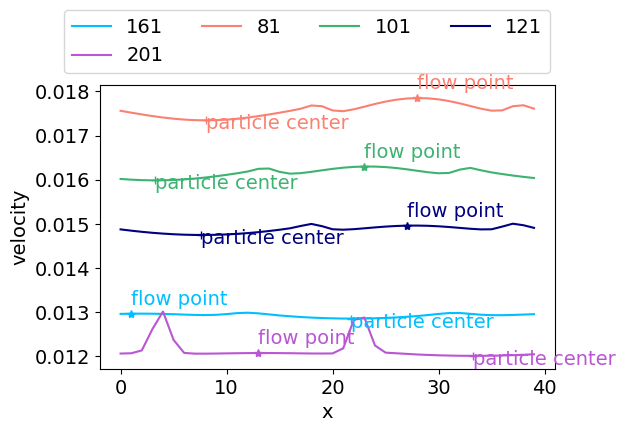

In [20]:
fig, ax = plt.subplots()

for i, folder in enumerate(folders):
    arr = np.loadtxt(folder + '/disk_re_0.25_0_rel_velocity.txt')
    print(arr.shape)
#     for line in arr[-40::10]:
    line = arr[-1]
    ax.plot(line[-40::], label=str(W[i]), color=col[W[i]])
    ax.plot(line[1], line[3], '+', color=col[W[i]])
    ax.text(line[1], line[3] - 0.0002, 'particle center', color=col[W[i]])
    ind = (int(line[1]) + 20 ) % 40
    ax.plot(ind, line[-40 + ind], '*', color=col[W[i]])
    ax.text(ind, line[-40 + ind] + 0.0002, 'flow point', color=col[W[i]])
#     break
ax.set_xlabel('x')
ax.set_ylabel('velocity')

plt.legend(ncols=4, bbox_to_anchor=(-0.1, 1.3), loc='upper left')
# ax.set_ylim([0, 0.02])
fig.tight_layout()
fig.savefig(folder_pics + 'u_flow_u_drop.png', dpi=300)
fig.savefig(folder_pics + 'u_flow_u_drop.pdf', dpi=300)

161 0.841 0.0130 0.0087
201 0.858 0.0121 0.0052
81 0.748 0.0179 0.0284
101 0.782 0.0163 0.0193
121 0.807 0.0150 0.0142


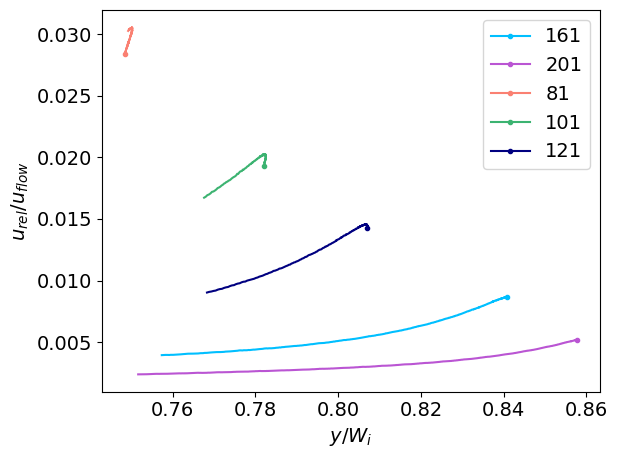

In [57]:
fig, ax = plt.subplots()

for i, folder in enumerate(folders):
    arr = np.loadtxt(folder + '/disk_re_0.25_0_rel_velocity.txt')
#     print(arr.shape)
    lst = []
    for line in arr[40:]:
        ind1 = (int(line[1]) + 20 ) % 40
        ind2 = (ind1 + 1) % 40
        weight = line[1] % 1
        u_flow = (1 - weight) * line[-40 + ind1] + weight * line[-40 + ind2]
        lst.append([line[2] / float(W[i]), u_flow, -(line[3] - u_flow) / u_flow])
        
    vel = np.array(lst)
    ax.plot(vel[:,0], vel[:, 2], '.-', color=col[W[i]], markevery=[-1], label=str(W[i]))
    print(W[i], f'{vel[-1, 0]:.3f}', f'{vel[-1, 1]:.4f}', f'{vel[-1, 2]:.4f}')

plt.legend()
# ax.set_ylim([0, 0.02])
ax.set_xlabel('$y/W_i$')
ax.set_ylabel('$u_{rel} / u_{flow}$')
fig.tight_layout()
fig.savefig(folder_pics + 'y_u_rel.png', dpi=300)
fig.savefig(folder_pics + 'y_u_rel.pdf', dpi=300)

In [16]:
line[:4]

array([4.76800000e+06, 1.54583912e+01, 1.35357135e+02, 1.28751112e-02])

<IPython.core.display.Javascript object>


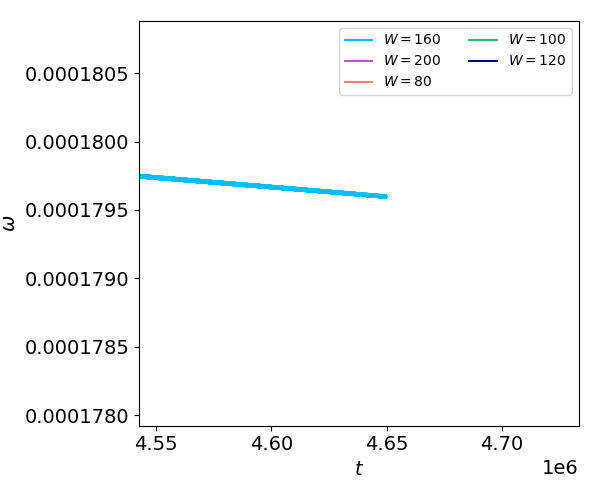

161 0.846 0.154
201 0.860 0.140
81 0.758 0.242
101 0.790 0.210
121 0.814 0.186


In [121]:
y_st = []
fig, ax = plt.subplots(figsize=(6,5))
for i, k in enumerate(sorted(d.keys())):
    #if inc[i] == 'BGK': continue
    label = r'$W=%d$'%(W[i]-1)
    arr = d[k]
    arr = arr[:-arr.shape[0]//25]
    mask = arr[:, 0] * u[i] / 10 < 8000000
    y_st.append([W[i], arr[mask,2][-1] / (W[i] - 1)])
    print(W[i], f'{arr[mask,2][-1] / (W[i] - 1):.3f}', f'{1 -arr[mask,2][-1] / (W[i] - 1):.3f}',
         )
    plt.plot(arr[mask,0] 
             #* u[i] / 10
             , - arr[mask,-1], 
             color=col[W[i]],
#              linestyle=line[W[i]],
#              markevery=[-1],
#              marker=marker[u[i]],
             markersize=7,
             label=label)
    plt.plot(arr[mask,0] 
             #* u[i] / 10
             , arr[mask,-1] , 
             color=col[W[i]],
#              linestyle=line[W[i]],
#              markevery=[-1],
#              marker=marker[u[i]],
             markersize=7)
    
plt.legend(loc='upper right', fontsize=10, ncol=2)
# ax.set_ylim([0.7, 1])

ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$\omega$')

fig.tight_layout()

# fig.savefig(folder_pics + f'array_of_disks_re_1_time_y.png', dpi=500)
# fig.savefig(folder_pics +f'array_of_disks_re_1_time_y.pdf', dpi=500)

In [81]:
1.22 % 1

0.21999999999999997

In [77]:
for i, folder in enumerate(folders):
    fin = np.load(folder + '/checkpoint_fin.npy')
    arr = np.loadtxt(folder + '/disk_re_0.25_0.txt')
    rho, u = macroscopic(fin, 1, v, fin.shape[1], fin.shape[2])
    unorm = (u[0] ** 2 + u[1] ** 2) ** 0.5
    ind = int((arr[-1, 0] // 8000) * 800)
#     print(arr.shape, ind)
    y = arr[ind, 2]
    weight = y % 1
    u_flow = (1 - weight) * unorm[:, int(y)] + weight * unorm[:, int(y) +1]
    u_particle = (arr[ind, 5] ** 2 + arr[ind, 6] ** 2) ** 0.5
#     fig, ax = plt.subplots()
#     fig.suptitle(folder)
#     plt.plot(u_flow)
    
#     plt.plot(arr[ind, 1], u_particle, '.')
#     plt.show()
#     plt.close()
    
    print(W[i], f'{u_flow.max():.5f}', f'{u_particle:.5f}', 
                  f'{(u_flow.max() - u_particle):.6f}', 
          f'{(u_flow.max() - u_particle) / u_flow.max():.3f}',
          f'{y/W[i]:.4f}', f'{arr[-1000, -1]:.7f}')
    

141 0.01579 0.01364 0.002157 0.137 0.1662 -0.0001976
201 0.01306 0.01116 0.001897 0.145 0.1291 -0.0001518
81 0.01786 0.01734 0.000518 0.029 0.2392 -0.0002715
101 0.01631 0.01598 0.000322 0.020 0.7820 0.0002436
121 0.01494 0.01472 0.000222 0.015 0.1844 -0.0002188


In [55]:
v = np.array([[1, 1], [1, 0], [1, -1], [0, 1], [0, 0],\
      [0, -1], [-1, 1], [-1, 0], [-1, -1]])
t = np.array([1 / 36, 1 / 9, 1 / 36, 1 / 9, 
              4 / 9, 
              1 / 9, 1 / 36, 1 / 9, 1 / 36]) 

def macroscopic(fin, rho0, v, nx, ny):
    rho = np.zeros((nx, ny))#np.sum(fin, axis=0)
    u = np.zeros((2, nx, ny))
    for i in range(9):
        u[0] += v[i, 0] * fin[i]
        u[1] += v[i, 1] * fin[i]
        rho += fin[i]
    u /= rho
    return rho, u


0.33 0.3 0.167
0.33 0.3 0.131
0.33 0.3 0.242


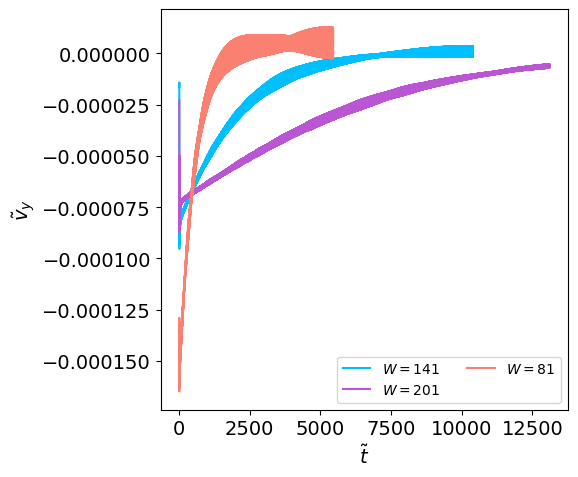

In [57]:
fig, ax = plt.subplots(figsize=(6,5))
for i, k in enumerate(d.keys()):
    label = r'$W=%d$'%(W[i])
    
    arr = d[k]
    arr = arr[:-500]
    mask = arr[:, 0] * u[i] / 10 < 4800000
    mask = np.logical_and(mask, arr[:, 0] * u[i] / 10 > 5)
    print(cs2[i], nu[i], f'{arr[mask,2][-1] / (W[i] - 1):.3f}')
    plt.plot(arr[mask,0] * u[i] / 10, arr[mask,6] / u[i], 
             color=col[W[i]],
#              linestyle=line[W[i]],
#              markevery=[-1],
#              marker=marker[u[i]],
             markersize=7,
             label=label)
    
plt.legend(loc='lower right', fontsize=10, ncol=2)
# ax.set_ylim([0.4, 1])

ax.set_xlabel(r'$\tilde t$')
ax.set_ylabel(r'$\tilde v_y$')

fig.tight_layout()

# fig.savefig(folder_pics + f're_{re[0]:.2f}_nd_time_nd_vc.png', dpi=500)
# fig.savefig(folder_pics +f're_{re[0]:.2f}_nd_time_nd_vc.pdf', dpi=500)

0.33 0.3 0.167
0.33 0.3 0.136
0.33 0.3 0.243


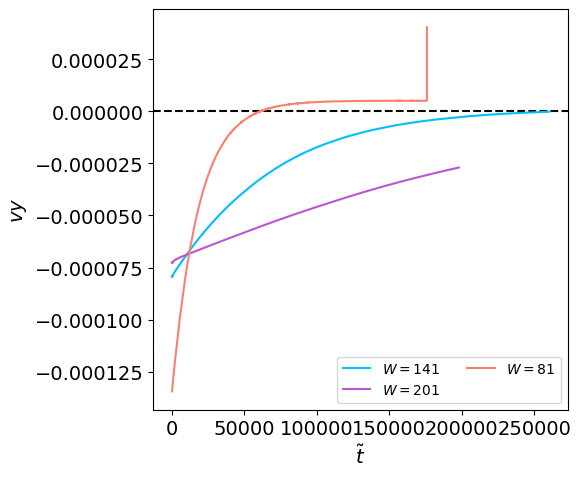

In [52]:
fig, ax = plt.subplots(figsize=(6,5))
for i, k in enumerate(d.keys()):
    label = r'$W=%d$'%(W[i])
    
    arr = d[k].copy()
#     arr = arr[::1500]
    mask = arr[:, 0] * u[i] / 10 < 48000000
    mask = np.logical_and(mask, arr[:, 0] * u[i] / 10 > 5)
    print(cs2[i], nu[i], f'{arr[mask,2][-1] / (W[i] - 1):.3f}')
    window = 6000
    moving_average = np.convolve(arr[mask,6]/ u[i], np.ones(window), 'valid') / window
    plt.plot(moving_average, 
             color=col[W[i]],
#              linestyle=line[W[i]],
#              markevery=[-1],
#              marker=marker[u[i]],
             markersize=7,
             label=label)
    
plt.legend(loc='lower right', fontsize=10, ncol=2)
# ax.set_ylim([0.4, 1])
ax.axhline(0, linestyle='--', color='k', zorder=-1)
ax.set_xlabel(r'$\tilde t$')
ax.set_ylabel(r'$vy$')

fig.tight_layout()

# fig.savefig(folder_pics + f're_{re[0]:.2f}_nd_time_nd_vy.png', dpi=500)
# fig.savefig(folder_pics + f're_{re[0]:.2f}_nd_time_nd_vy.pdf', dpi=500)

<IPython.core.display.Javascript object>


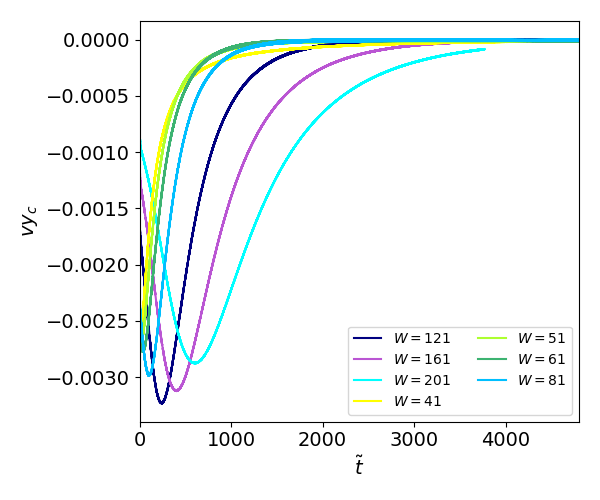

0.33 0.3 0.726
0.33 0.3 0.734
0.33 0.3 0.742
0.33 0.3 0.502
0.33 0.3 0.618
0.33 0.3 0.665
0.33 0.3 0.701


In [590]:
fig, ax = plt.subplots(figsize=(6,5))
for i, k in enumerate(d.keys()):
    label = r'$W=%d$'%(W[i])
    
    arr = d[k].copy()
    arr = arr[:-500]
    mask = arr[:, 0] * u[i] / 10 > 5
    print(cs2[i], nu[i], f'{arr[mask,2][-1] / (W[i] - 1):.3f}')
    plt.plot(arr[mask,0] * u[i] / 10,  arr[mask,6] / u[i], 
             color=col[W[i]],
#              linestyle=line[W[i]],
#              markevery=[-1],
#              marker=marker[u[i]],
             markersize=7,
             label=label)
    
plt.legend(loc='lower right', fontsize=10, ncol=2)
# ax.set_ylim([0.4, 1])
ax.set_xlim([0, 4800])

ax.set_xlabel(r'$\tilde t$')
ax.set_ylabel(r'$vy_c$')

fig.tight_layout()

fig.savefig(folder_pics + f're_{re[0]:.2f}_nd_time_nd_vy.png', dpi=500)
fig.savefig(folder_pics + f're_{re[0]:.2f}_nd_time_nd_vy.pdf', dpi=500)

<IPython.core.display.Javascript object>


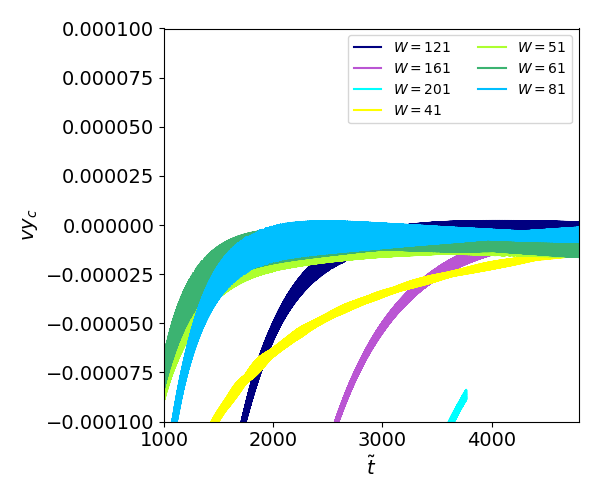

0.33 0.3 0.726
0.33 0.3 0.734
0.33 0.3 0.742
0.33 0.3 0.502
0.33 0.3 0.618
0.33 0.3 0.665
0.33 0.3 0.701


In [591]:
fig, ax = plt.subplots(figsize=(6,5))
for i, k in enumerate(d.keys()):
    label = r'$W=%d$'%(W[i])
    
    arr = d[k].copy()
    arr = arr[:-500]
    mask = arr[:, 0] * u[i] / 10 > 5
    print(cs2[i], nu[i], f'{arr[mask,2][-1] / (W[i] - 1):.3f}')
    plt.plot(arr[mask,0] * u[i] / 10,  arr[mask,6] / u[i], 
             color=col[W[i]],
#              linestyle=line[W[i]],
#              markevery=[-1],
#              marker=marker[u[i]],
             markersize=7,
             label=label)
    
plt.legend(loc='upper right', fontsize=10, ncol=2)
ax.set_ylim([-1e-4, 1e-4])
ax.set_xlim([1000, 4800])

ax.set_xlabel(r'$\tilde t$')
ax.set_ylabel(r'$vy_c$')

fig.tight_layout()

fig.savefig(folder_pics + f're_{re[0]:.2f}_nd_time_nd_vy_crop.png', dpi=500)
fig.savefig(folder_pics + f're_{re[0]:.2f}_nd_time_nd_vy_crop.pdf', dpi=500)

<IPython.core.display.Javascript object>


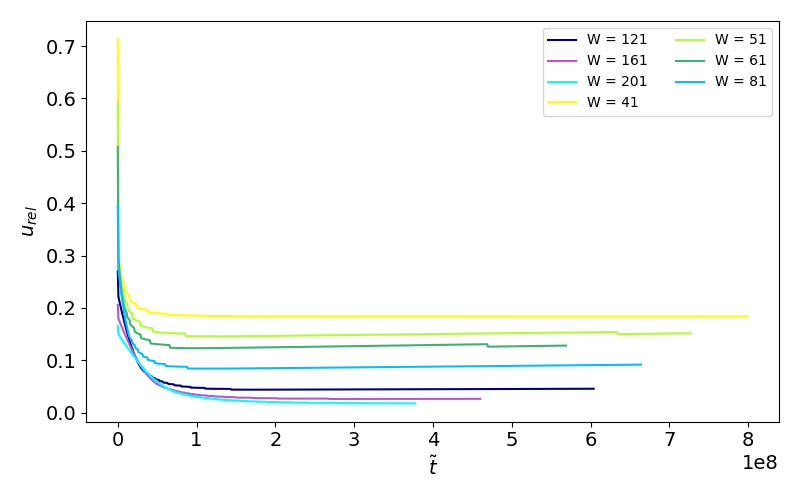

tmp_cs2_0.33_re_0.50_nu_0.30_u_0.01_tau_1.40_cy_109.00_W_121_L_601_rho_1.00
121 0.01222322000727055
tmp_cs2_0.33_re_0.50_nu_0.30_u_0.01_tau_1.40_cy_149.00_W_161_L_601_rho_1.00
161 0.011973648570020682
tmp_cs2_0.33_re_0.50_nu_0.30_u_0.01_tau_1.40_cy_189.00_W_201_L_601_rho_1.00
201 0.011684104290873323
tmp_cs2_0.33_re_0.50_nu_0.30_u_0.01_tau_1.40_cy_29.00_W_41_L_601_rho_1.00
41 0.015686386766620326
tmp_cs2_0.33_re_0.50_nu_0.30_u_0.01_tau_1.40_cy_39.00_W_51_L_601_rho_1.00
51 0.014941392863490449
tmp_cs2_0.33_re_0.50_nu_0.30_u_0.01_tau_1.40_cy_49.00_W_61_L_601_rho_1.00
61 0.014141234381615813
tmp_cs2_0.33_re_0.50_nu_0.30_u_0.01_tau_1.40_cy_69.00_W_81_L_601_rho_1.00
81 0.013010395391059217


In [592]:
fig, ax = plt.subplots(figsize=(8,5))
rel = []
for i, k in enumerate(d.keys()):
    print(k)
    arr = np.loadtxt(k + '/disk_re_0.25_0_rel_velocity.txt')
    if len(arr.shape) == 1: continue
    x = arr[:, 1]
    y = arr[:, 2]
    v = arr[:, 3]
    unorm = arr[:, 4:]
#     u_rel = unorm.max(axis=1) - v
    u_flow = []
    for j in range(x.shape[0]):
        pois = np.polyfit([-0.5, int(y[j]), W[i] - 0.5], [0, unorm[j].max(), 0], 2)
        u_flow.append(pois[0] * y[j] ** 2 + pois[1] * y[j] + pois[2])
        
    u_flow = np.array(u_flow)
    
    u_rel = u_flow - v
    
    print(W[i], unorm[-1].max())
    rel.append([(20 / W[i]) ** 2, u_rel[-1] / u[i]])
#     plt.plot(arr[:, 2] / W[i], u_rel, '.', label=k)
    plt.plot(arr[:, 0] / u[i], u_rel / u[i], label='W = ' + str(W[i]), color=col[W[i]])
    
plt.legend(loc='upper right', fontsize=10, ncol=2)


ax.set_xlabel(r'$\tilde t$')
ax.set_ylabel(r'$u_{rel}$')

fig.tight_layout()

# fig.savefig(folder_pics + 'nd_time_nd_y_tau_nu_2.png', dpi=500)
# fig.savefig(folder_pics +'nd_time_nd_y_tau_nu_2.pdf', dpi=500)

<IPython.core.display.Javascript object>


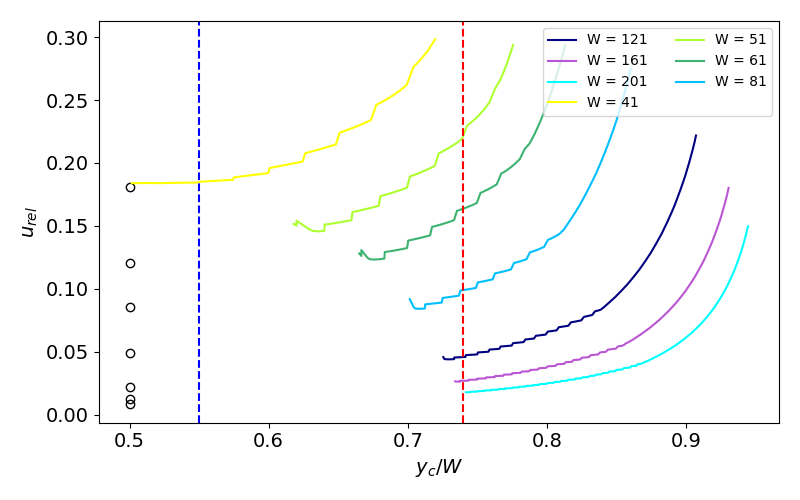

tmp_cs2_0.33_re_0.50_nu_0.30_u_0.01_tau_1.40_cy_109.00_W_121_L_601_rho_1.00
121 0.01222322000727055
tmp_cs2_0.33_re_0.50_nu_0.30_u_0.01_tau_1.40_cy_149.00_W_161_L_601_rho_1.00
161 0.011973648570020682
tmp_cs2_0.33_re_0.50_nu_0.30_u_0.01_tau_1.40_cy_189.00_W_201_L_601_rho_1.00
201 0.011684104290873323
tmp_cs2_0.33_re_0.50_nu_0.30_u_0.01_tau_1.40_cy_29.00_W_41_L_601_rho_1.00
41 0.015686386766620326
tmp_cs2_0.33_re_0.50_nu_0.30_u_0.01_tau_1.40_cy_39.00_W_51_L_601_rho_1.00
51 0.014941392863490449
tmp_cs2_0.33_re_0.50_nu_0.30_u_0.01_tau_1.40_cy_49.00_W_61_L_601_rho_1.00
61 0.014141234381615813
tmp_cs2_0.33_re_0.50_nu_0.30_u_0.01_tau_1.40_cy_69.00_W_81_L_601_rho_1.00
81 0.013010395391059217


In [593]:
fig, ax = plt.subplots(figsize=(8,5))

# rel_center = np.loadtxt('rel_vel_center.txt')
rel_center = np.loadtxt(f'rel_vel_center_re_{re[0]:.2f}.txt')
plt.plot(np.ones(rel_center.shape[0]) * 0.5, rel_center[:, 1], 'ok', mfc='none')

rel = []
for i, k in enumerate(d.keys()):
    print(k)
    arr = np.loadtxt(k + '/disk_re_0.25_0_rel_velocity.txt')
    arr = arr[1:]
    if len(arr.shape) == 1: continue
    x = arr[:, 1]
    y = arr[:, 2]
    v = arr[:, 3]
    unorm = arr[:, 4:]
#     u_rel = unorm.max(axis=1) - v
    u_flow = []
    for j in range(x.shape[0]):
        pois = np.polyfit([-0.5, int(y[j]), W[i] - 0.5], [0, unorm[j].max(), 0], 2)
        u_flow.append(pois[0] * y[j] ** 2 + pois[1] * y[j] + pois[2])
        
    u_flow = np.array(u_flow)
    
    u_rel = u_flow - v
    
    print(W[i], unorm[-1].max())
    rel.append([(20 / (W[i]-1)) ** 2, u_rel[-1] / u[i]])
#     plt.plot(arr[:, 2] / W[i], u_rel, '.', label=k)
    plt.plot((arr[:, 2] / (W[i]-1)), u_rel / u[i], label='W = ' + str(W[i]), color=col[W[i]])
    
plt.legend(loc='upper right', fontsize=10, ncol=2)

ax.axvline(0.55, linestyle='--', color='b')
ax.axvline(0.74, linestyle='--', color='r')

# plt.plot(np.ones(4) * 0.55, [0.1615, 0.1236, 0.0813, 0.0583],'ob', mfc='none')
# plt.plot(np.ones(6) * 0.74, [0.1492, 0.1098, 0.0663, 0.03214, 0.01884, 0.01225], 'or', mfc='none')

ax.set_xlabel(r'$y_c / W$')
ax.set_ylabel(r'$u_{rel}$')

fig.tight_layout()

# fig.savefig(folder_pics + f'y_urel_re_{re[0]:.2f}.png', dpi=500)
# fig.savefig(folder_pics + f'y_urel_re_{re[0]:.2f}.pdf', dpi=500)

0.7227493378583856 0.002473205495505416


<IPython.core.display.Javascript object>


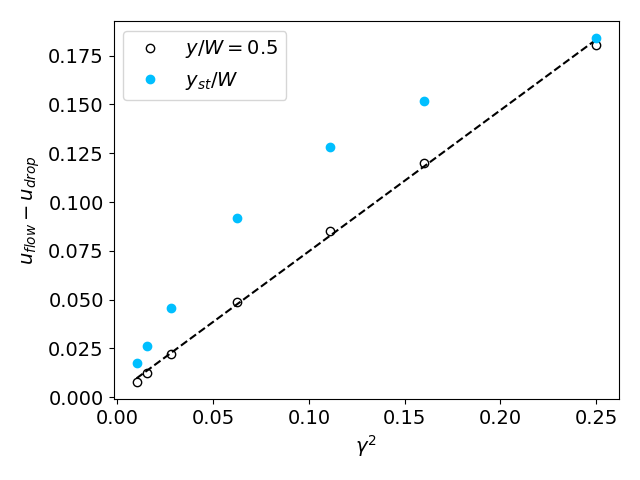

In [594]:
rel_center = np.loadtxt('rel_vel_center.txt')
rel_center = np.loadtxt(f'rel_vel_center_re_{re[0]:.2f}.txt')
rel_center = rel_center[np.argsort(rel_center[:,0])]
a, b = np.polyfit(rel_center[:,0], rel_center[:,1], 1)
print(a, b)
plt.plot(rel_center[:,0], rel_center[:, 1], 'ok', mfc='none', label='$y/W=0.5$')
plt.plot(rel_center[:,0], a * rel_center[:,0] + b, '--k')

# x = (20 / np.array([34, 40, 50, 60])) ** 2
# y = [0.1615, 0.1236, 0.0813, 0.0583]
# a, b = np.polyfit(x, y, 1)
# print(a, b)
# plt.plot(x, y,
#          'ob', mfc='none', label='$y/W=0.55$')
# plt.plot(x, a * x + b, '--b')

# x = (20 / np.array([50, 60, 80, 120, 160, 200])) ** 2
# y = [0.1492, 0.1098, 0.0663, 0.03214, 0.01884, 0.01225]
# a, b = np.polyfit(x, y, 1)
# print(a, b)
# plt.plot(x, y, 'or', mfc='none', label='$y/W=0.74$')
# plt.plot(x, a * x + b, '--r')
rel = np.array(rel)
plt.plot(rel[:,0], rel[:, 1], 'o', color='deepskyblue', label='$y_{st} / W$')

plt.legend()



plt.xlabel(r'$\gamma^2$')
plt.ylabel(r'$u_{flow} - u_{drop}$')
fig, ax = plt.gcf(), plt.gca()

fig.tight_layout()
# fig.savefig(folder_pics + 'gamma2_urel_diff_y.png', dpi=500)
# fig.savefig(folder_pics + 'gamma2_urel_diff_y.pdf', dpi=500)

0.7227493378583856 0.002473205495505416


<IPython.core.display.Javascript object>


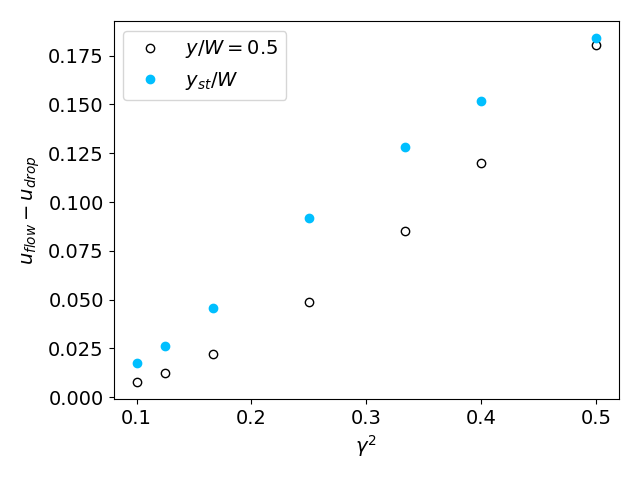

In [595]:
rel_center = np.loadtxt('rel_vel_center.txt')
rel_center = np.loadtxt(f'rel_vel_center_re_{re[0]:.2f}.txt')
rel_center = rel_center[np.argsort(rel_center[:,0])]
a, b = np.polyfit(rel_center[:,0], rel_center[:,1], 1)
print(a, b)
plt.plot(rel_center[:,0]**0.5, rel_center[:, 1], 'ok', mfc='none', label='$y/W=0.5$')
# plt.plot(rel_center[:,0], a * rel_center[:,0] + b, '--k')

# x = (20 / np.array([34, 40, 50, 60])) ** 2
# y = [0.1615, 0.1236, 0.0813, 0.0583]
# a, b = np.polyfit(x, y, 1)
# print(a, b)
# plt.plot(x, y,
#          'ob', mfc='none', label='$y/W=0.55$')
# plt.plot(x, a * x + b, '--b')

# x = (20 / np.array([50, 60, 80, 120, 160, 200])) ** 2
# y = [0.1492, 0.1098, 0.0663, 0.03214, 0.01884, 0.01225]
# a, b = np.polyfit(x, y, 1)
# print(a, b)
# plt.plot(x, y, 'or', mfc='none', label='$y/W=0.74$')
# plt.plot(x, a * x + b, '--r')
rel = np.array(rel)
plt.plot(rel[:,0] ** 0.5, rel[:, 1], 'o', color='deepskyblue', label='$y_{st} / W$')

plt.legend()



plt.xlabel(r'$\gamma^2$')
plt.ylabel(r'$u_{flow} - u_{drop}$')
fig, ax = plt.gcf(), plt.gca()

fig.tight_layout()
# fig.savefig(folder_pics + 'gamma2_urel_diff_y.png', dpi=500)
# fig.savefig(folder_pics + 'gamma2_urel_diff_y.pdf', dpi=500)

<IPython.core.display.Javascript object>


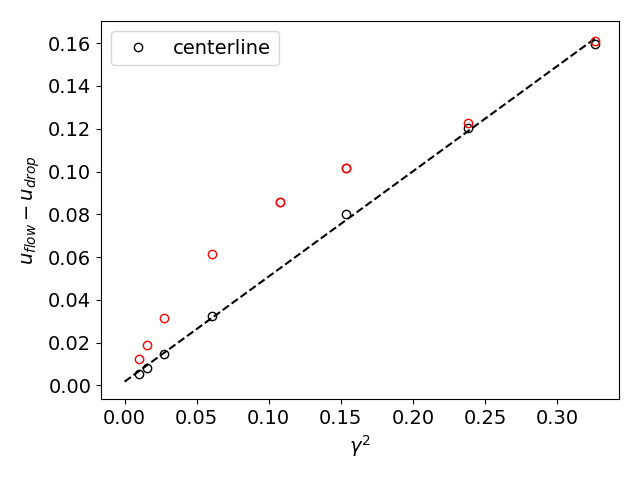

0.4918107853020546 0.001769741931682837


In [422]:
rel_center = np.loadtxt('rel_vel_center.txt')
plt.plot(rel_center[:,0], rel_center[:, 1], 'ok', mfc='none', label='centerline')
ind = np.argmax(rel_center[:, 0])

a, b = np.polyfit(rel_center[:,0], rel_center[:,1], 1)
x = np.array([0, rel_center[:, 0].max()])
y = a * x + b
print(a, b)
plt.plot(x, y, '--k')

rel = np.array(rel)
plt.plot(rel[:,0], rel[:, 1], 'or', mfc='none')
plt.legend()

fig, ax = plt.gcf(), plt.gca()
ax.set_xlabel(r'$\gamma^2$')
ax.set_ylabel('$u_{flow} - u_{drop}$')
fig.tight_layout()

fig.savefig(folder_pics + 'gamma2_u_rel.png', dpi=500)
fig.savefig(folder_pics +'gamma2_u_rel.pdf', dpi=500)

<IPython.core.display.Javascript object>


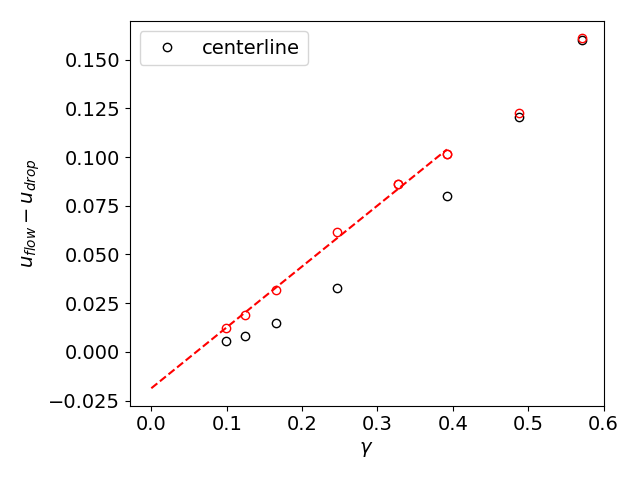

0.3124094767275822 -0.018635199911752623


In [427]:
rel_center = np.loadtxt('rel_vel_center.txt')
plt.plot(rel_center[:,0] ** 0.5, rel_center[:, 1], 'ok', mfc='none', label='centerline')
ind = np.argmax(rel_center[:, 0])

# a, b = np.polyfit(rel_center[:,0], rel_center[:,1], 1)
# x = np.array([0, rel_center[:, 0].max()])
# y = a * x + b
# print(a, b)
# plt.plot(x, y, '--k')

rel = np.array(rel)
plt.plot(rel[:,0] ** 0.5, rel[:, 1], 'or', mfc='none')
plt.legend()
rel = rel[np.argsort(rel[:,0])]

a, b = np.polyfit(rel[:-2,0] ** 0.5, rel[:-2,1], 1)
x = np.array([0, rel[:-2, 0].max() ** 0.5])
y = a * x + b
print(a, b)
plt.plot(x, y, '--r')

fig, ax = plt.gcf(), plt.gca()
ax.set_xlabel(r'$\gamma$')
ax.set_ylabel('$u_{flow} - u_{drop}$')
fig.tight_layout()

fig.savefig(folder_pics + 'gamma_u_rel.png', dpi=500)
fig.savefig(folder_pics +'gamma_u_rel.pdf', dpi=500)

In [56]:
%matplotlib notebook

In [79]:
from one_particle import macroscopic

In [80]:
v = np.array([[1, 1], [1, 0], [1, -1], [0, 1], [0, 0],\
              [0, -1], [-1, 1], [-1, 0], [-1, -1]])
t = np.array([1 / 36, 1 / 9, 1 / 36, 1 / 9, 
              4 / 9, 
              1 / 9, 1 / 36, 1 / 9, 1 / 36]) 

In [86]:
k = folders[0]
fin = np.load(k + '/checkpoint_fin.npy')
rho, u_ = macroscopic(fin, 1, v, 600, 41)

In [87]:
unorm = (u_[0] ** 2 + u_[1] ** 2) ** 0.5

In [88]:
arr = d[k]

In [97]:
arr[46400]

array([ 4.64000000e+05,  2.44197705e+01,  2.31163300e+01,  3.43530483e+01,
        2.80130875e+01,  6.89852917e-02, -3.06793747e-06, -1.91372213e-05,
       -2.31695125e-06,  8.09946032e-05,  5.11830774e-04])

In [93]:
4.71480000e+05 // 8000

58.0

In [94]:
58 * 8000

464000

In [96]:
ind = np.argmin(abs(arr[:,0] - 464000))
ind

46400

<IPython.core.display.Javascript object>


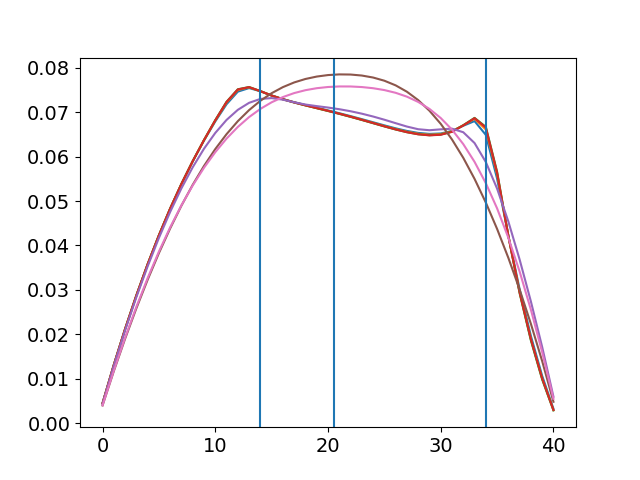

In [104]:
plt.plot(unorm[22])
plt.plot(unorm[23])
plt.plot(unorm[24])
plt.plot(unorm[25])
plt.plot(unorm[15])
plt.plot(unorm[45])
plt.plot(unorm[5])
plt.axvline(20.5)
plt.axvline(14)
plt.axvline(34)